# Exercice 5
**Oscar Savioz, Daniel Ribeiro Cabral & Bastien Veuthey**

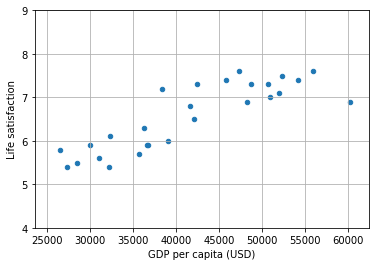

[[6.30165767]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
lifesat = pd.read_csv("lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]


In [2]:
X_test = np.linspace(25000, 60000, 200)
X_test = [[value] for value in X_test]
y_test = model.predict(X_test)

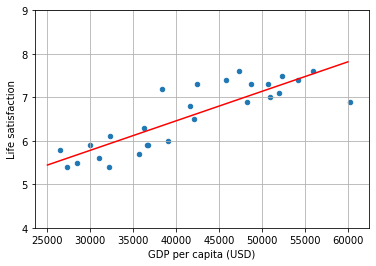

In [3]:
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.plot(X_test, y_test, color='red')
plt.show()

In [4]:
class KNearestNeighborRegressor(object):
  """ a kNN regressor with L2 distance """

  def __init__(self):
    self.X_train = None
    self.y_train = None

  def train(self, X, y):
    """
    Train the classifier. For k-nearest neighbors this is just 
    memorizing the training data.

    Inputs:
    - X: A numpy array of shape (num_train, D) containing the training data
      consisting of num_train samples each of dimension D.
    - y: A numpy array of shape (N,) containing the training labels, where
         y[i] is the label for X[i].
    """
    self.X_train = X
    self.y_train = y
    
  def predict(self, X, k=1):
    """
    Predict labels for test data using this classifier.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data consisting
         of num_test samples each of dimension D.
    - k: The number of nearest neighbors that vote for the predicted labels.
    - num_loops: Determines which implementation to use to compute distances
      between training points and testing points.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].  
    """
    dists = self.compute_distances(X)
    
    return self.predict_values(dists, k=k)


  def compute_distances(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using a single loop over the test data.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data.

    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
        # Compute euclidean distance
        dists[i, :] = np.sqrt(np.sum((X[i] - self.X_train) ** 2, axis=1))
    return dists

  def predict_values(self, dists, k=1):
    """
    Given a matrix of distances between test points and training points,
    predict a value for each test point.

    Inputs:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance between the ith test point and the jth training point.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted values for the
      test data, where y[i] is the predicted value for the test point X[i].  
    """
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
        # Sort distances to find the indices of the k nearest neighbors
        closest_indices = np.argsort(dists[i])[:k]

        # Get the labels and distances of the k nearest neighbors
        closest_labels = self.y_train[closest_indices]

        # Compute the simple average of the target values of the k nearest neighbors
        y_pred[i] = np.sum(closest_labels) / k

    return y_pred

In [5]:
knn_reg = KNearestNeighborRegressor()
knn_reg.train(np.array(X), y)

In [6]:
y_hat_1 = knn_reg.predict(np.array(X_test), k=1)
y_hat_3 = knn_reg.predict(np.array(X_test), k=3)
y_hat_5 = knn_reg.predict(np.array(X_test), k=5)
y_hat_7 = knn_reg.predict(np.array(X_test), k=7)
y_hat_20 = knn_reg.predict(np.array(X_test), k=20)
y_hat_27 = knn_reg.predict(np.array(X_test), k=27)

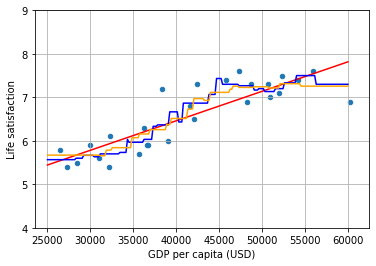

In [7]:
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.plot(X_test, y_test, color='red')
plt.plot(X_test, y_hat_3, color='blue')
plt.plot(X_test, y_hat_7, color='orange')
plt.show()


Questions :

 - We use K=7 to answer the questions

a)  What is the predicted life satisfaction for Cyprus assuming that the GDP per capita is 38,341 USD ?
 -> 6.257

b)  What is the predicted life satisfaction for Switzerland assuming that the GDP per capita is 69,669 USD ?
 -> 7.257

In [8]:
question_a = knn_reg.predict(np.array([38341]), k=7)
question_b = knn_reg.predict(np.array([69669]), k=7)

print(f"Cyprus life satisfaction : {question_a}")
print(f"Switzerland life satisfaction : {question_b}")

Cyprus life satisfaction : [6.25714286]
Switzerland life satisfaction : [7.25714286]


c)  What becomes the prediction when K is approaching N (the number of points in the training set). Do the experiment with K = 20 and K = 27, report your observation.

-> We can see that the prediction are really "flat" as there is not enough data sample to predict correctly. The following plot shows the prediction for the test set with K=20 and K=27

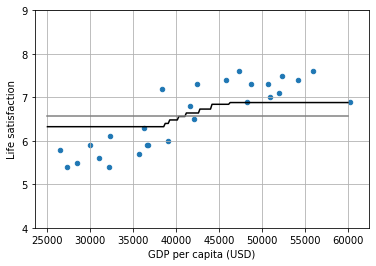

In [9]:
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])

plt.plot(X_test, y_hat_20, color='black')
plt.plot(X_test, y_hat_27, color='grey')

plt.show()
